**Simple Linear Regression**

In [1]:
#Step 1:importing necessary libraries
import numpy as np # For handling numerical data
import pandas as pd  
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns
from sklearn.linear_model import LinearRegression   # For building the regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [4]:
#step3: create the linear regression model
model=LinearRegression() #initializing the model

In [5]:
#step 4:Train the model 
model.fit(X,Y)  

LinearRegression()

In [6]:
#step5:get values of slope and intercept
m=model.coef_[0]
c=model.intercept_
print("coefficient:",m)
print("intercept:",c)

coefficient: 4.965498141580591
intercept: 27.430065779800536


In [7]:
#step 6: display the line equation
print(f"Equation of line :Y = {m:.2f}X + {c:.2f}")

Equation of line :Y = 4.97X + 27.43


In [8]:
#step 7:predict values using model
Y_pred = model.predict(X)   #predict salaries for the given experience 

In [9]:
#Model -Evaluation metrics

In [10]:
# 1)  Mean squared error(MSE)
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.75


In [11]:
# 2) Mean Absolute Error(MAE)
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean absolute Error (MAE): {mae:.2f}")

Mean absolute Error (MAE): 2.87


In [12]:
# 3)Root Mean Squared Error(RMSE)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")

Root Mean Squared Error (RMSE):3.43


In [13]:
# 4) R-Squared(R^2)
r2=r2_score(Y,Y_pred)
print(f"R-Squared (R^2):{r2:.2f}")


R-Squared (R^2):0.95


In [14]:
# 5) Adjusted R-squared(R^2_adj)
n=len(Y)
p=1
adj_r2=1 - ((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.2f}")

Adjusted R-squared: 0.94


In [15]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:10:06   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


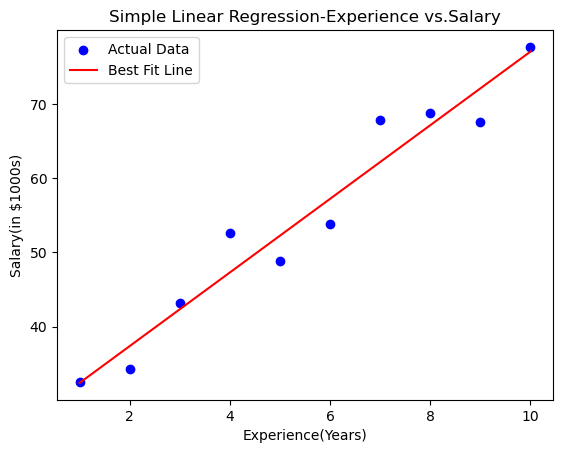

In [16]:
#step 8: Plot the actual data points 
plt.scatter(X,Y,color='blue',label='Actual Data')

#step 9:plot the regression line(Best Fit Line)
plt.plot(X,Y_pred,color='red',label='Best Fit Line')

#step 10: add Labels and Legend
plt.xlabel('Experience(Years)') #label for x-axis
plt.ylabel('Salary(in $1000s)') #label for Y-axis
plt.title('Simple Linear Regression-Experience vs.Salary')
plt.legend()
#step 11:display 
plt.show()


In [17]:
#user inputs experience and model predicts salary
while True:
    try:
        exp=float(input("Enter your experience to predict salary(or -1 to exit):"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for (exp) years of experience is :${predicted_salary:.2f}K\n\n")
    except ValueError:
        print("Please enter a valid number!")
        

Enter your experience to predict salary(or -1 to exit): 1


Predicted Salary for (exp) years of experience is :$32.40K




Enter your experience to predict salary(or -1 to exit): 10


Predicted Salary for (exp) years of experience is :$77.09K




Enter your experience to predict salary(or -1 to exit): 13


Predicted Salary for (exp) years of experience is :$91.98K




Enter your experience to predict salary(or -1 to exit): 44


Predicted Salary for (exp) years of experience is :$245.91K




Enter your experience to predict salary(or -1 to exit): -1


**STEPS:**

1)IMPORT RESPECTIVE LIBRARIES

2)DEFINE DATASET

3)CREATE REGRESSION MODEL

4)TRAIN MODEL

5)FIND THE SLOPE AND INTERCEPT VALUES

6)DISPLAY THE LINE EQUATION

7)PREDICT VALUES ,METRICS AND ERRORS(MSE,MAE,RMSE,R^2,ADJ_R^2,OLS)

8)VISUALIZATION 

->PLOT ACTUAL DATAPOINTS 

->PLOT REGRESSION LINE-BEST FIT LINE

->ADD LEGEND AND LABELS

->DISPLAY

9)USER INPUTS AND PREDICTION